In [270]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
from scipy import stats

In [271]:
plt.style.use(['science', 'notebook', 'grid'])

In [272]:
data = pd.read_excel('UELab2.xlsx', sheet_name='1 a)')
inputVoltage = data['Uin']
outputVoltage = data['Uout']

a)

In [273]:
linFit = stats.linregress(inputVoltage[4:32], outputVoltage[4:32])
linFit

LinregressResult(slope=0.9992232639037265, intercept=-0.0023361368940061356, rvalue=0.9999981440679856, pvalue=3.9352360018176847e-72, stderr=0.0003775482805673604, intercept_stderr=0.0028994556265500163)

Vos = 2.338


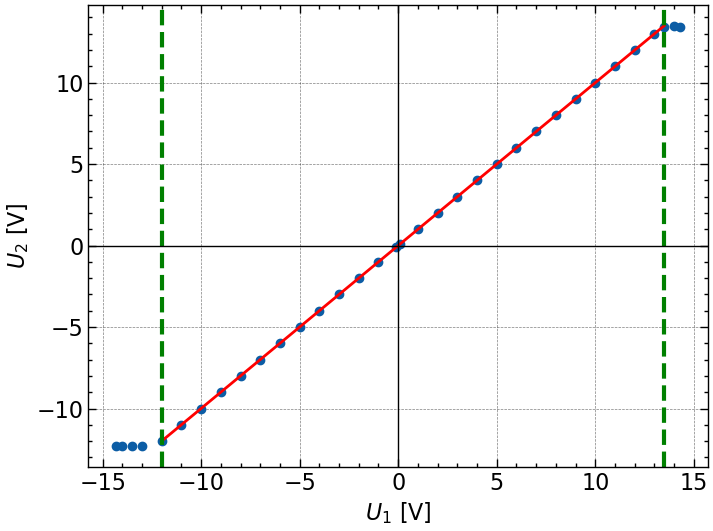

In [274]:
fig, ax = plt.subplots(1, 1)
ax.plot(inputVoltage, outputVoltage, 'o')
ax.plot(inputVoltage[4:32], linFit.slope*inputVoltage[4:32] + linFit.intercept, 'red')
ax.axvline(x=inputVoltage[4], linestyle = '--', color = 'green', linewidth = 3)
ax.axvline(x=inputVoltage[31], linestyle = '--', color = 'green', linewidth = 3)
ax.axvline(x=0, color = 'black', linewidth = 1)
ax.axhline(y=0, color = 'black', linewidth = 1)
ax.set_xlabel(r'$U_{1} ~[\text{V}]$')
ax.set_ylabel(r'$U_{2} ~[\text{V}]$')
voltageUnbalance = (-linFit.intercept/linFit.slope)
print(f'Vos = {round(voltageUnbalance * 1000, 4)}')


b)

In [275]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.optimize import curve_fit


In [276]:
data = pd.read_excel('UELab2.xlsx', sheet_name='1 d)')
inputVoltage = data['U1']
outputVoltage = data['U2']
amplification = outputVoltage/inputVoltage
amplificationDB = 20*np.log10(amplification)
frequency = data['f']

In [277]:
linFit = stats.linregress(np.log10(frequency[14:]), amplificationDB[14:])
db3lvl = np.max(amplificationDB[:12]) - 3
# Obliczenie częstotliwości dla y = max - 3 dB
cutoff_frequency_log10 = (db3lvl - linFit.intercept) / linFit.slope
cutoff_frequency = 10 ** cutoff_frequency_log10  # Konwersja z logarytmu do częstotliwości w Hz
cutoff_frequency, linFit

(809855.3022061285,
 LinregressResult(slope=-30.141042942085505, intercept=175.34042307558252, rvalue=-0.9819132759371543, pvalue=0.0029120039935547747, stderr=3.355419285041211, intercept_stderr=21.061047392724443))

In [317]:
linFitFlat = stats.linregress(np.log10(frequency[0:12]), amplificationDB[0:12])
linFitFlat, np.power(10 ** linFitFlat.intercept, 1/20)

(LinregressResult(slope=-0.00497883310598024, intercept=0.11669790350088262, rvalue=-0.07728272529959473, pvalue=0.811318485463927, stderr=0.020311608338001885, intercept_stderr=0.07103857235576534),
 1.013526002425357)

Text(0, 0.5, 'Wzmocnienie [dB]')

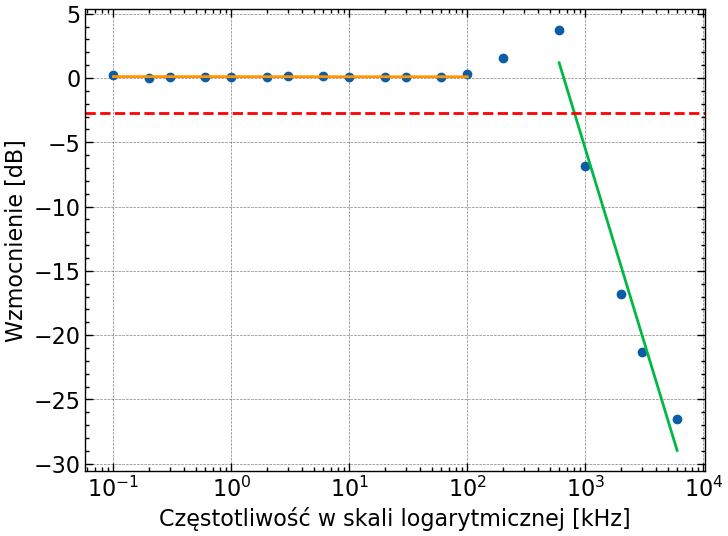

In [290]:
fig, ax = plt.subplots(1,1)
ax.semilogx(frequency/1000, amplificationDB, 'o')
ax.semilogx(frequency[14:]/1000, np.log10(frequency[14:]) * linFit.slope + linFit.intercept)
ax.semilogx(frequency[0:13]/1000, np.log10(frequency[0:13]) * linFitFlat.slope + linFitFlat.intercept)
ax.axhline(y=db3lvl, color = 'red', linestyle = '--')
ax.set_xlabel('Częstotliwość w skali logarytmicznej [kHz]')
ax.set_ylabel('Wzmocnienie [dB]')